# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from pprint import pprint
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

581

In [3]:
cities

['olafsvik',
 'kapaa',
 'mersing',
 'nizhneyansk',
 'cape town',
 'avarua',
 'hobart',
 'biak',
 'antofagasta',
 'severo-kurilsk',
 'nelson bay',
 'samarai',
 'husavik',
 'namatanai',
 'punta arenas',
 'ken caryl',
 'torbay',
 'dzhusaly',
 'rikitea',
 'ye',
 'lavrentiya',
 'artyk',
 'georgetown',
 'bathsheba',
 'hithadhoo',
 'te anau',
 'dikson',
 'bluff',
 'arroio do meio',
 'esperance',
 'carpentras',
 'ndele',
 'poum',
 'butaritari',
 'ribeira grande',
 'busselton',
 'grindavik',
 'wanning',
 'palma',
 'marsh harbour',
 'port blair',
 'karpathos',
 'itarema',
 'albany',
 'ushuaia',
 'hermanus',
 'pangai',
 'tsihombe',
 'kabanjahe',
 'bredasdorp',
 'allanridge',
 'altagracia de orituco',
 'belushya guba',
 'thompson',
 'storforshei',
 'rio gallegos',
 'iracoubo',
 'carnarvon',
 'tabou',
 'barentsburg',
 'san cristobal',
 'yellowknife',
 'haibowan',
 'arraial do cabo',
 'grand river south east',
 'puerto ayora',
 'bara',
 'clyde river',
 'cidreira',
 'saldanha',
 'portland',
 'kimpara

In [4]:
cities_pd = pd.DataFrame(cities)
cities_pd = cities_pd.rename(columns={0: "City"})
cities_pd["Latitude"] = ""
cities_pd["Longitude"] = ""
cities_pd["Max Temperature"] = ""
cities_pd["Humidity"] = ""
cities_pd["Cloudiness"] = ""
cities_pd["Wind Speed"] = ""
cities_pd["Country"] = ""
cities_pd["Date"] = ""
cities_pd.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,olafsvik,,,,,,,,
1,kapaa,,,,,,,,
2,mersing,,,,,,,,
3,nizhneyansk,,,,,,,,
4,cape town,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [5]:
# Performing the API calls and printing the log all at once:
# city_index = 0

units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"

print("----------------------------------------")
print("Beginning Data Retrieval:")
print("----------------------------------------")

# Creating lists to store the city/location, temp, etc:
location = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

city_num = 1
city_set = 1

for city in cities:
    q_url = f"{url}&appid={weather_api_key}&q={city}&units={units}"
    temp_response = requests.get(q_url).json()
    
    print(f"Processing records: {city_num} of Set {city_set} | {city}")

    try:
        city_num += 1
        location.append(temp_response['name'])        
        lat.append(temp_response['coord']['lat'])
        long.append(temp_response['coord']['lon'])
        max_temp.append(temp_response['main']['temp'])
        humidity.append(temp_response['main']['humidity'])
        cloudiness.append(temp_response['clouds']['all'])
        wind_speed.append(temp_response['wind']['speed'])
        country.append(temp_response['sys']['country'])
        date.append(temp_response['dt'])
        
    except (KeyError, IndexError):
        print("City not found. Resuming...")
        pass
    
    if city_num == 51:
        city_set += 1
        city_num = 1
        
print("---------------------------------------")
print("Data Retrieval Complete")
print("---------------------------------------")

----------------------------------------
Beginning Data Retrieval:
----------------------------------------
Processing records: 1 of Set 1 | olafsvik
Processing records: 2 of Set 1 | kapaa
Processing records: 3 of Set 1 | mersing
Processing records: 4 of Set 1 | nizhneyansk
City not found. Resuming...
Processing records: 5 of Set 1 | cape town
Processing records: 6 of Set 1 | avarua
Processing records: 7 of Set 1 | hobart
Processing records: 8 of Set 1 | biak
Processing records: 9 of Set 1 | antofagasta
Processing records: 10 of Set 1 | severo-kurilsk
Processing records: 11 of Set 1 | nelson bay
Processing records: 12 of Set 1 | samarai
Processing records: 13 of Set 1 | husavik
Processing records: 14 of Set 1 | namatanai
Processing records: 15 of Set 1 | punta arenas
Processing records: 16 of Set 1 | ken caryl
Processing records: 17 of Set 1 | torbay
Processing records: 18 of Set 1 | dzhusaly
City not found. Resuming...
Processing records: 19 of Set 1 | rikitea
Processing records: 20 o

Processing records: 24 of Set 4 | birin
Processing records: 25 of Set 4 | amargosa
Processing records: 26 of Set 4 | rocha
Processing records: 27 of Set 4 | filingue
Processing records: 28 of Set 4 | sisimiut
Processing records: 29 of Set 4 | atuona
Processing records: 30 of Set 4 | asyut
Processing records: 31 of Set 4 | yerbogachen
Processing records: 32 of Set 4 | mancio lima
Processing records: 33 of Set 4 | zhuhai
Processing records: 34 of Set 4 | moose factory
Processing records: 35 of Set 4 | general pico
Processing records: 36 of Set 4 | romita
Processing records: 37 of Set 4 | fevralsk
City not found. Resuming...
Processing records: 38 of Set 4 | chagda
City not found. Resuming...
Processing records: 39 of Set 4 | lompoc
Processing records: 40 of Set 4 | launceston
Processing records: 41 of Set 4 | saryshagan
City not found. Resuming...
Processing records: 42 of Set 4 | talnakh
Processing records: 43 of Set 4 | donzdorf
Processing records: 44 of Set 4 | mulege
Processing recor

Processing records: 3 of Set 8 | kavieng
Processing records: 4 of Set 8 | hearst
Processing records: 5 of Set 8 | hervey bay
Processing records: 6 of Set 8 | san carlos de bariloche
Processing records: 7 of Set 8 | yulara
Processing records: 8 of Set 8 | geraldton
Processing records: 9 of Set 8 | kawana waters
City not found. Resuming...
Processing records: 10 of Set 8 | ust-kulom
Processing records: 11 of Set 8 | baruun-urt
Processing records: 12 of Set 8 | ternate
Processing records: 13 of Set 8 | narsaq
Processing records: 14 of Set 8 | monroe
Processing records: 15 of Set 8 | victor harbor
Processing records: 16 of Set 8 | sayat
Processing records: 17 of Set 8 | muzquiz
City not found. Resuming...
Processing records: 18 of Set 8 | lolua
City not found. Resuming...
Processing records: 19 of Set 8 | skjervoy
Processing records: 20 of Set 8 | bengkulu
Processing records: 21 of Set 8 | boyolangu
Processing records: 22 of Set 8 | luanda
Processing records: 23 of Set 8 | usogorsk
Process

Processing records: 31 of Set 11 | miraflores
Processing records: 32 of Set 11 | manaul
Processing records: 33 of Set 11 | ferme-neuve
Processing records: 34 of Set 11 | kommunar
Processing records: 35 of Set 11 | kango
Processing records: 36 of Set 11 | lagunas
Processing records: 37 of Set 11 | sabang
Processing records: 38 of Set 11 | ahuimanu
Processing records: 39 of Set 11 | honiara
Processing records: 40 of Set 11 | sipe sipe
Processing records: 41 of Set 11 | devils lake
Processing records: 42 of Set 11 | shimoda
Processing records: 43 of Set 11 | puerto montt
Processing records: 44 of Set 11 | budogoshch
Processing records: 45 of Set 11 | pacific grove
Processing records: 46 of Set 11 | goose creek
Processing records: 47 of Set 11 | tornio
Processing records: 48 of Set 11 | nyurba
Processing records: 49 of Set 11 | elizabeth city
Processing records: 50 of Set 11 | boditi
Processing records: 1 of Set 12 | kirakira
Processing records: 2 of Set 12 | avera
Processing records: 3 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_pd.count()

City               581
Latitude           581
Longitude          581
Max Temperature    581
Humidity           581
Cloudiness         581
Wind Speed         581
Country            581
Date               581
dtype: int64

In [7]:
# Displaying the DataFrame:
cities_pd = pd.DataFrame({
    "City": location,
    "Latitude": lat,
    "Longitude": long,
    "Max Temperature": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})

cities_pd.head(10)

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Olafsvik,64.89,-23.71,50.70,77,67,9.28,IS,1594359040
1,Kapaa,22.08,-159.32,77.18,74,40,16.11,US,1594358775
2,Mersing,2.43,103.84,82.40,88,40,1.12,MY,1594359041
3,Cape Town,-33.93,18.42,50.34,93,75,12.75,ZA,1594358774
4,Avarua,-21.21,-159.78,73.40,83,100,3.36,CK,1594359041
5,Hobart,-42.88,147.33,47.10,81,100,8.05,AU,1594358960
6,Biak,-0.91,122.88,79.79,82,95,7.02,ID,1594359042
7,Antofagasta,-23.65,-70.40,57.20,71,90,4.70,CL,1594359042
8,Severo-Kuril'sk,50.68,156.12,49.71,94,100,10.54,RU,1594359043
9,Nelson Bay,-32.72,152.15,61.48,82,90,8.05,AU,1594359043


In [8]:
# Converting the city data into a 'csv' file:
# Output File (CSV)
cities_output = cities_pd.to_csv('../OutputData/cities.csv', index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Find the cities with humidity that is over 100%:

humidity_over100 = cities_pd.sort_values('Humidity', ascending=False)
humidity_over100

#This shows that this particular collection of cities does not have humidity over 100%:

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
499,Borovoy,55.43,86.08,57.20,100,90,11.18,RU,1594359174
297,Bethel,41.37,-73.41,70.09,100,1,2.73,US,1594359122
483,Port Montt,-41.47,-72.94,41.00,100,90,5.82,CL,1594359170
340,Larsnes,62.20,5.58,48.94,100,75,10.29,NO,1594359133
487,Tornio,65.85,24.15,51.80,100,20,5.82,FI,1594359171
...,...,...,...,...,...,...,...,...,...
260,Jinchang,38.50,102.17,88.14,13,26,9.71,CN,1594359112
287,Rūdbār,30.15,62.60,100.31,10,0,16.80,AF,1594359017
198,Zhob,31.34,69.45,94.26,9,0,7.54,PK,1594359095
142,Saint George,37.10,-113.58,85.68,6,1,6.93,US,1594358957


In [10]:
#  Get the indices of cities that have humidity over 100%.

# NONE FOUND; therefore, skipping this portion

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# NONE FOUND; therefore, skipping this portion

In [12]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv

# NONE FOUND; therefore, skipping this portion

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

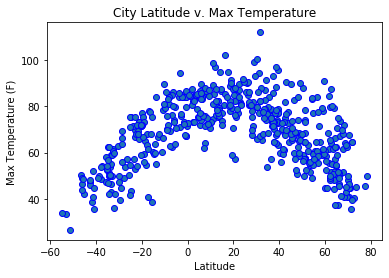

In [13]:
# Plotting latitude v. max_temp:
x = cities_pd['Latitude']
y = cities_pd['Max Temperature']
plt.scatter(x, y, edgecolor='b')
plt.title("City Latitude v. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig('../OutputData/Fig1.png')
plt.show()

## Latitude vs. Humidity Plot

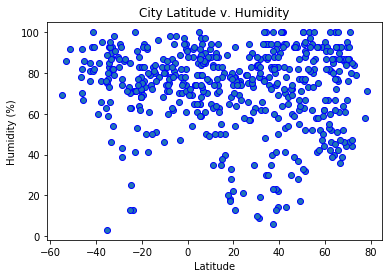

In [14]:
# Plotting latitude v. humidity:
x = cities_pd['Latitude']
y = cities_pd['Humidity']
plt.scatter(x, y, edgecolor='b')
plt.title("City Latitude v. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('../OutputData/Fig2.png')
plt.show()

## Latitude vs. Cloudiness Plot

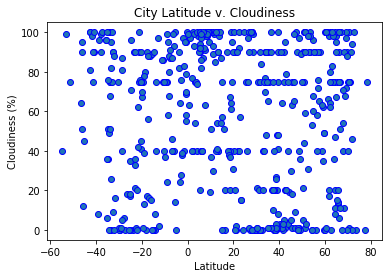

In [15]:
# Plotting latitude v. cloudiness:
x = cities_pd['Latitude']
y = cities_pd['Cloudiness']
plt.scatter(x, y, edgecolor='b')
plt.title("City Latitude v. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('../OutputData/Fig3.png')
plt.show()

## Latitude vs. Wind Speed Plot

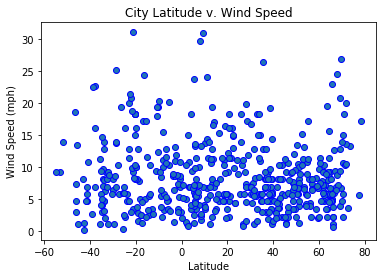

In [16]:
# Plotting latitude v. wind_speed:
x = cities_pd['Latitude']
y = cities_pd['Wind Speed']
plt.scatter(x, y, edgecolor='b')
plt.title("City Latitude v. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('../OutputData/Fig4.png')
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression